<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/python_day_learning_18_chatter_bot_repo_clone_dummy_data_prediction%20rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalasi library & wheel
!pip install --upgrade pip setuptools
!pip install --upgrade wheel

#clone git repo chatterbot
!pip install git+https://github.com/gunthercox/ChatterBot.git@master
!pip install chatterbot-corpus

from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer

!apt-get install -y python-dev build-essential

# Inisialisasi chatbot
chatbot = ChatBot(
    'Chatbot Bahasa Indonesia',
    logic_adapters=[
        'chatterbot.logic.BestMatch',
        'chatterbot.logic.MathematicalEvaluation'
    ]
)

# Data pelatihan ringan bahasa Indonesia
indonesian_conversation = [
    "Halo",
    "Halo! Apa kabar?",
    "Apa kabar?",
    "Baik, terima kasih. Anda?",
    "Siapa namamu?",
    "Saya adalah chatbot sederhana buatan Anda",
    "Berapa umurmu?",
    "Saya tidak memiliki usia karena saya adalah program komputer",
    "Terima kasih",
    "Sama-sama! Ada yang bisa saya bantu lagi?",
    "Sampai jumpa",
    "Sampai bertemu lagi! Semoga hari Anda menyenangkan"
]

# Pelatihan dengan corpus bahasa Indonesia
trainer = ChatterBotCorpusTrainer(chatbot)
trainer.train("chatterbot.corpus.indonesian")

# Pelatihan dengan dataset ringan
list_trainer = ListTrainer(chatbot)
list_trainer.train(indonesian_conversation)

def chat():
    print("Halo! Saya chatbot berbahasa Indonesia. Ketik 'exit' untuk keluar.")
    while True:
        user_input = input("Anda: ")
        if user_input.lower() == 'exit':
            break
        response = chatbot.get_response(user_input)
        print(f"Bot: {response}")

chat()

  Cloning https://github.com/gunthercox/ChatterBot.git (to revision master) to /tmp/pip-req-build-ldj6jxjz
  Running command git clone --filter=blob:none --quiet https://github.com/gunthercox/ChatterBot.git /tmp/pip-req-build-ldj6jxjz
  Resolved https://github.com/gunthercox/ChatterBot.git to commit 46a6e6216140a7994fb1f7af38f5ae482b22bcf1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate


ChatterBot Corpus Trainer: 3it [00:00,  5.81it/s]
List Trainer: 12it [00:00, 670.19it/s]


Halo! Saya chatbot berbahasa Indonesia. Ketik 'exit' untuk keluar.
Anda: halo apa kabar?
Bot: Apa kabar?
Anda: baik, anda?
Bot: Eksplisit lebih baik daripada implisit.
Anda: lah?
Bot: Everest.
Anda: masak apa?
Bot: Apakah kamu sudah punya pacar?
Anda: belum?
Bot: Itu adalah sebuah definisi atau hanya pendapat?
Anda: menurut kamu?
Bot: Aku adalah aku. Aku pahlawan bertopeng
Anda: luar biasa!
Bot: luar biasa
Anda: exit


In [ ]:
# Instalasi library
!pip install --upgrade pip
!pip install git+https://github.com/gunthercox/ChatterBot.git@master
!pip install chatterbot-corpus

# Buat dataset YAML (JALANKAN DULU SEBELUM YANG BERIKUTNYA)
with open('produk_merek_x.yml', 'w') as f:
    f.write('''
conversations:
  - - "Apa model sepatu terbaru?"
    - "Model terbaru kami adalah 'X Sport Max' untuk olahraga dan 'X Luxury Sneaker' untuk gaya kasual."

  - - "Harga tas X Series berapa?"
    - "Tas X Series tersedia dengan harga mulai dari Rp 2.500.000 hingga Rp 5.000.000 tergantung model."

  - - "Ada promo bulan ini?"
    - "Sedang ada promo 20% untuk pembelian pertama di aplikasi kami!"
    ''')

# Import library
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer

# Dataset khusus untuk kebijakan
kebijakan_list = [
    "Kebijakan pengembalian?",
    "Barang bisa dikembalikan dalam 7 hari dengan kondisi baru.",

    "Jam operasional?",
    "Toko online 24 jam, layanan CS jam 08.00-22.00 WIB.",

    "Lokasi cabang?",
    "Cabang terdekat di Mall Utama Lantai 2, Jl. Pembangunan No. 123.",

    "Ukuran sepatu standar?",
    "Ukuran 38-45 untuk wanita dan 39-46 untuk pria."
]

# Inisialisasi chatbot
chatbot = ChatBot('ChatbotMerekX',
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    logic_adapters=[
        {
            'import_path': 'chatterbot.logic.BestMatch',
            'default_response': "Maaf, saya belum tahu jawabannya. Silakan hubungi CS di 021-12345678.",
            'maximum_similarity_threshold': 0.70
        }
    ])

# Pelatihan dengan dataset YAML
corpus_trainer = ChatterBotCorpusTrainer(chatbot)
corpus_trainer.train("produk_merek_x.yml")  # Pastikan nama file benar

# Pelatihan dengan dataset kebijakan
list_trainer = ListTrainer(chatbot)
list_trainer.train(kebijakan_list)

# Tambahkan dataset umum
list_trainer.train([
    "Halo",
    "Halo! Selamat datang di layanan chat Merek X.",

    "Terima kasih",
    "Sama-sama! Jika ada yang perlu dibantu, silakan tanya kembali.",

    "Bantuan",
    "Saya bisa membantu Anda dengan produk, pesanan, atau kebijakan."
])

def chat():
    print("Halo! Saya chatbot Merek X. Ketik 'exit' untuk keluar.")
    while True:
        user_input = input("Anda: ")
        if user_input.lower() == 'exit':
            break
        response = chatbot.get_response(user_input)
        print(f"Bot: {response}")

chat()

  Cloning https://github.com/gunthercox/ChatterBot.git (to revision master) to /tmp/pip-req-build-b5j_c9mc
  Running command git clone --filter=blob:none --quiet https://github.com/gunthercox/ChatterBot.git /tmp/pip-req-build-b5j_c9mc
  Resolved https://github.com/gunthercox/ChatterBot.git to commit 46a6e6216140a7994fb1f7af38f5ae482b22bcf1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


ChatterBot Corpus Trainer: 0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'produk_merek_x/yml'

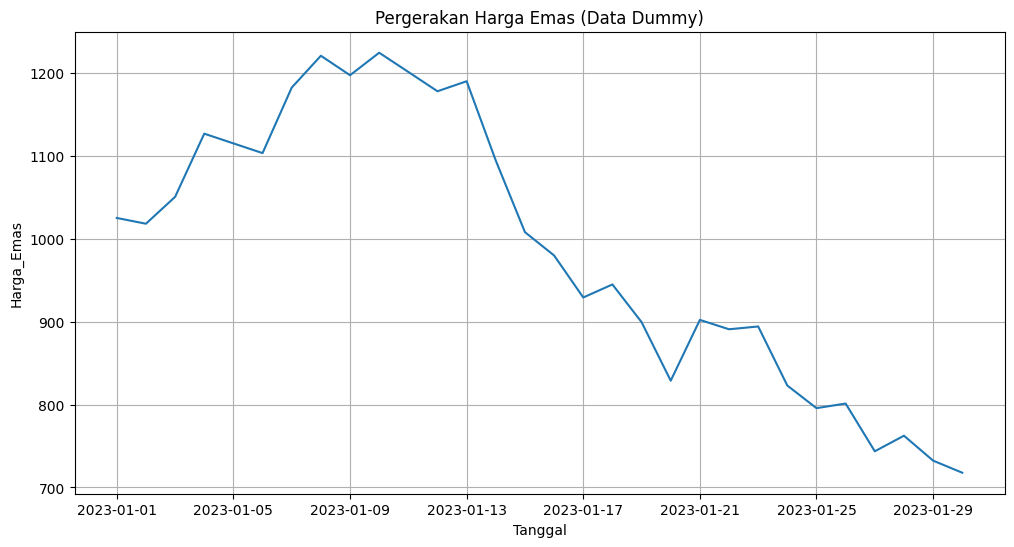

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


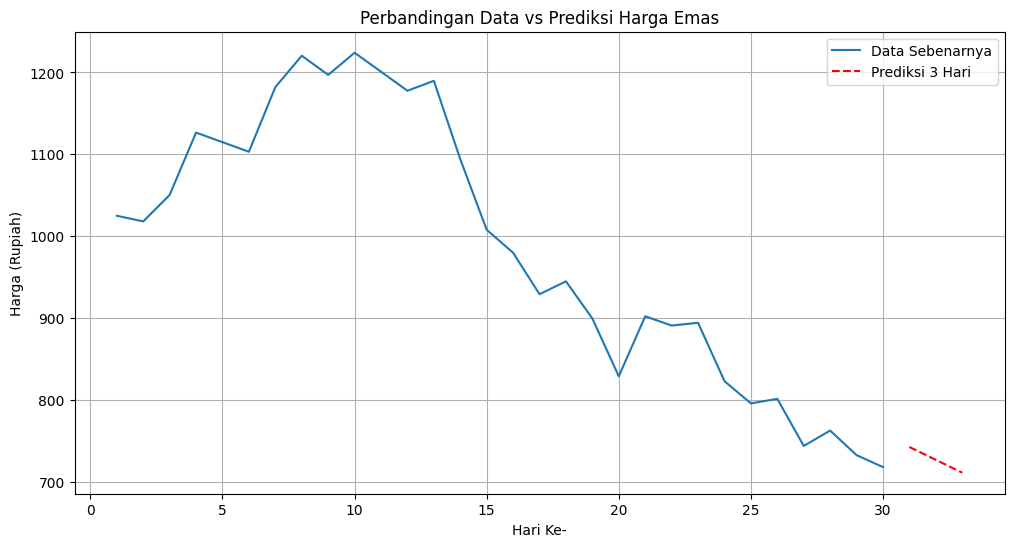

MAE: 68.13120185091749

Prediksi 3 Hari Kedepan:
    Day_Number  Harga_Emas_Prediksi
30          31           742.319495
31          32           726.610203
32          33           710.900912


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Menghasilkan data dummy harga emas (30 hari)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=30, freq='D')
prices = 1000 + 50 * np.random.randn(30).cumsum()  # Simulasi fluktuasi harga

# Buat DataFrame
df = pd.DataFrame({'Tanggal': dates, 'Harga_Emas': prices})
df['Day_Number'] = np.arange(1, len(df)+1)  # Kolom untuk regresi

# Visualisasi data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tanggal', y='Harga_Emas', data=df)
plt.title('Pergerakan Harga Emas (Data Dummy)')
plt.grid(True)
plt.show()

# Split data
X = df[['Day_Number']]  # Fitur (hari ke-n)
y = df['Harga_Emas']    # Target

# Gunakan semua data untuk training (karena data terbatas)
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
last_day = df['Day_Number'].max()
future_days = np.array([[last_day + i] for i in range(1, 4)])
predictions = model.predict(future_days)

# Tambahkan prediksi ke DataFrame
df_predictions = pd.DataFrame({
    'Day_Number': future_days.flatten(),
    'Harga_Emas_Prediksi': predictions
})

# Gabungkan data asli + prediksi
full_df = pd.concat([df, df_predictions]).reset_index(drop=True)

# Visualisasi hasil
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day_Number', y='Harga_Emas', data=df, label='Data Sebenarnya')
sns.lineplot(x='Day_Number', y='Harga_Emas_Prediksi', data=full_df, color='red', linestyle='--', label='Prediksi 3 Hari')
plt.title('Perbandingan Data vs Prediksi Harga Emas')
plt.xlabel('Hari Ke-')
plt.ylabel('Harga (Rupiah)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model (gunakan data asli)
y_pred = model.predict(X)
print("MAE:", mean_absolute_error(y, y_pred))
print("\nPrediksi 3 Hari Kedepan:")
print(full_df[['Day_Number', 'Harga_Emas_Prediksi']].tail(3))

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Ambil data harga emas (GC=F)
emas = yf.download("GC=F", start="2020-01-01", end="2023-12-31")
emas = emas[['Close']].rename(columns={'Close': 'Harga_Emas'})

# Tambahkan fitur moving average 7 hari
emas['MA_7'] = emas['Harga_Emas'].rolling(window=7).mean()

# Tambahkan data inflasi (data dummy)
emas['Inflasi'] = np.random.uniform(2.0, 5.0, len(emas))

# Hapus NaN
emas = emas.dropna()

# Ubah data menjadi format yang sesuai untuk ARIMA
data = emas[['Harga_Emas', 'MA_7']].values  # 2D array (n_samples, 2)

# Split data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Model ARIMA dengan fitur MA_7
model = ARIMA(endog=train[:, 0], exog=train[:, 1:], order=(5, 1, 0))
model_fit = model.fit()

# Prediksi 3 hari kedepan
last_ma = emas['MA_7'].iloc[-1]  # Perbaikan FutureWarning
future_ma = [last_ma] * 3  # Asumsikan MA_7 tetap
forecast = model_fit.forecast(steps=3, exog=np.array(future_ma).reshape(-1, 1))

# Visualisasi
plt.figure(figsize=(14, 7))

# Plot Harga Emas
sns.lineplot(
    x=emas.index,
    y=emas['Harga_Emas'],  # Pastikan ini adalah Series 1D
    label='Harga Emas'
)

# Plot MA 7 Hari (hanya 30 hari terakhir)
sns.lineplot(
    x=emas.index[-30:],
    y=emas['MA_7'][-30:],  # Pastikan ini adalah Series 1D
    color='orange',
    label='MA 7 Hari'
)

# Garis pemisah train-test
plt.axvline(
    x=emas.index[train_size],
    color='red',
    linestyle='--',
    label='Mulai Test'
)

plt.title('Harga Emas dengan Prediksi ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()

print("Prediksi 3 Hari Kedepan:", forecast)

[*********************100%***********************]  1 of 1 completed


ValueError: Data must be 1-dimensional, got ndarray of shape (1000, 1) instead

<Figure size 1400x700 with 0 Axes>

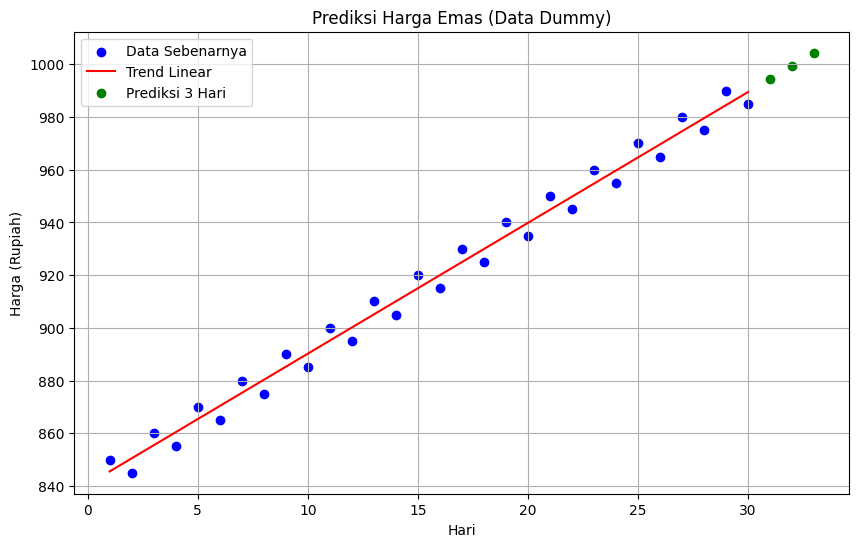

Prediksi 3 Hari Kedepan:
Hari ke-31: Rp 994.48 ribuan
Hari ke-32: Rp 999.45 ribuan
Hari ke-33: Rp 1004.42 ribuan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dummy harga emas (30 hari- dummy)
days = np.arange(1, 31)
prices = np.array([
    850, 845, 860, 855, 870,
    865, 880, 875, 890, 885,
    900, 895, 910, 905, 920,
    915, 930, 925, 940, 935,
    950, 945, 960, 955, 970,
    965, 980, 975, 990, 985
])

# Bentuk data untuk scikit-learn (harus 2D)
X = days.reshape(-1, 1)  # Fitur (hari)
y = prices  # Target (harga)

# Latih model
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
future_days = np.array([31, 32, 33]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(days, prices, color='blue', label='Data Sebenarnya')
plt.plot(days, model.predict(X), color='red', label='Trend Linear')
plt.scatter(future_days, predictions, color='green', label='Prediksi 3 Hari')
plt.title('Prediksi Harga Emas (Data Dummy)')
plt.xlabel('Hari')
plt.ylabel('Harga (Rupiah)')
plt.legend()
plt.grid(True)
plt.show()

print("Prediksi 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price:.2f} ribuan")

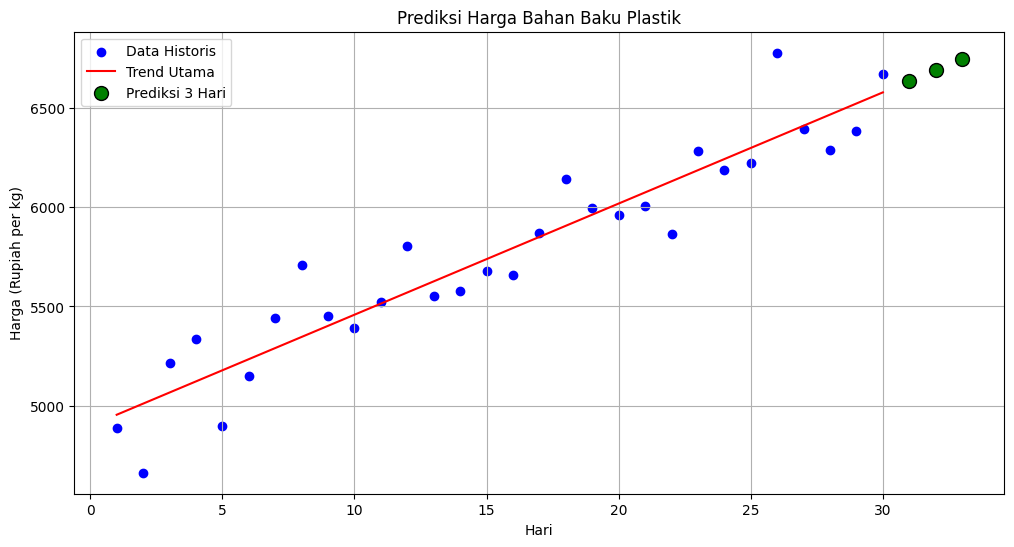


Prediksi Harga 3 Hari Kedepan:
Hari ke-31: Rp 6635.13
Hari ke-32: Rp 6691.17
Hari ke-33: Rp 6747.21


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dummy 30 hari (fluktuasi harga bahan baku plastik)
days = np.arange(1, 31)
base_price = 5000  # Harga dasar (misal: Rp 5.000 per kg)
noise = np.random.normal(0, 150, 30)  # Fluktuasi acak ±150 rupiah

# Harga dasar + tren naik + fluktuasi
prices = (
    base_price +
    50 * days +  # Tren naik Rp50/hari
    noise        # Fluktuasi acak
)

# Bentuk data untuk scikit-learn
X = days.reshape(-1, 1)
y = prices

# Latih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
future_days = np.array([31, 32, 33]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.scatter(days, prices, color='blue', label='Data Historis')
plt.plot(days, model.predict(X), color='red', label='Trend Utama')
plt.scatter(future_days, predictions, color='green', edgecolor='black', s=100, label='Prediksi 3 Hari')
plt.title('Prediksi Harga Bahan Baku Plastik')
plt.xlabel('Hari')
plt.ylabel('Harga (Rupiah per kg)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPrediksi Harga 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price:.2f}")

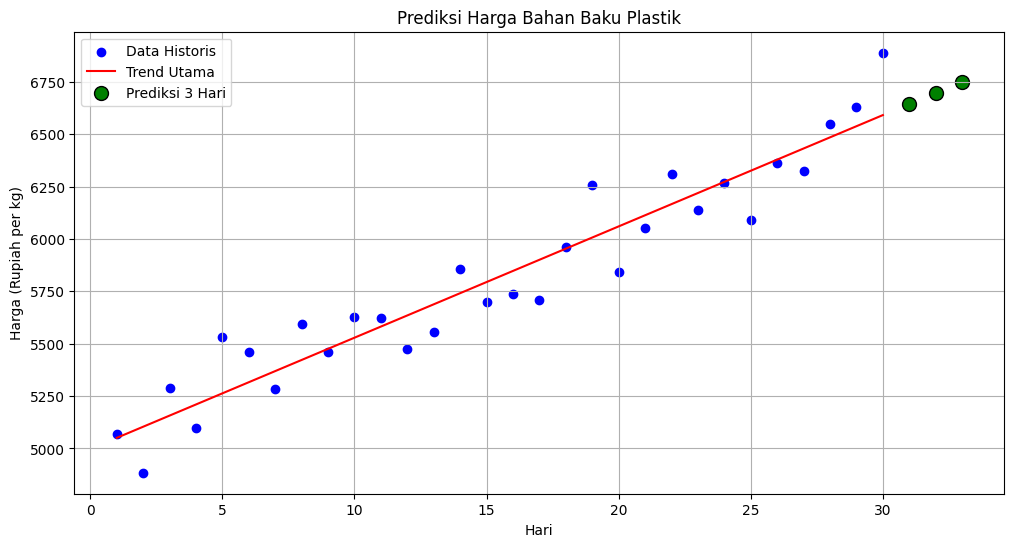


Prediksi Harga 3 Hari Kedepan:
Hari ke-31: Rp 6643.95
Hari ke-32: Rp 6697.06
Hari ke-33: Rp 6750.17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dummy 30 hari (fluktuasi harga bahan baku plastik)
days = np.arange(1, 31)
base_price = 5000  # Harga dasar (misal: Rp 5.000 per kg)
noise = np.random.normal(0, 150, 30)  # Fluktuasi acak ±150 rupiah

# Harga dasar + tren naik + fluktuasi
prices = (
    base_price +
    50 * days +  # Tren naik Rp50/hari
    noise        # Fluktuasi acak
)

# Bentuk data untuk scikit-learn
X = days.reshape(-1, 1)
y = prices

# Latih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
future_days = np.array([31, 32, 33]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.scatter(days, prices, color='blue', label='Data Historis')
plt.plot(days, model.predict(X), color='red', label='Trend Utama')
plt.scatter(future_days, predictions, color='green', edgecolor='black', s=100, label='Prediksi 3 Hari')
plt.title('Prediksi Harga Bahan Baku Plastik')
plt.xlabel('Hari')
plt.ylabel('Harga (Rupiah per kg)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPrediksi Harga 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price:.2f}")

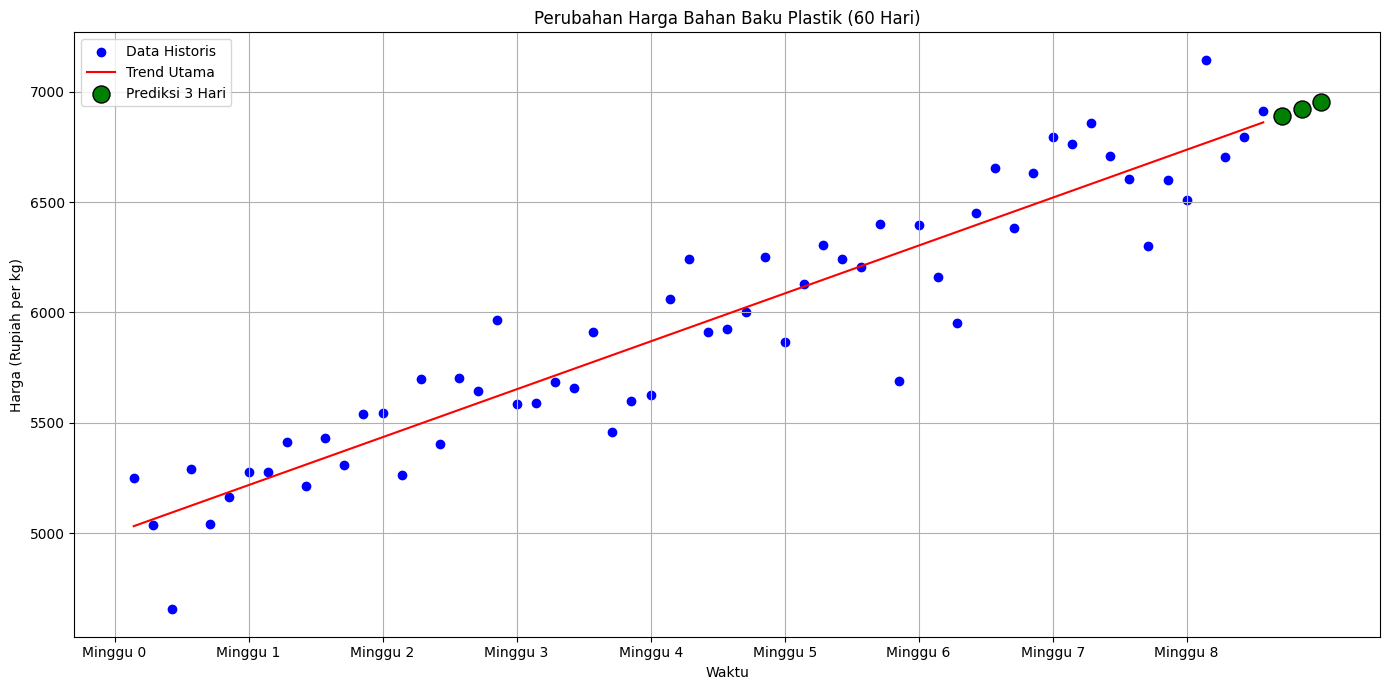


Prediksi Harga 3 Hari Kedepan:
Hari ke-61: Rp 6891.70
Hari ke-62: Rp 6922.69
Hari ke-63: Rp 6953.69


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dummy 60 hari
days = np.arange(1, 61)
base_price = 5000  # Harga dasar (misal: Rp 5.000 per kg)
noise = np.random.normal(0, 200, 60)  # Fluktuasi ±200 rupiah

# Harga dasar + tren naik + fluktuasi
prices = (
    base_price +
    30 * days +  # Tren naik Rp30/hari
    noise        # Fluktuasi acak
)

# Bentuk data untuk scikit-learn
X = days.reshape(-1, 1)
y = prices

# Latih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
future_days = np.array([61, 62, 63]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(14, 7))

# Plot data historis
plt.scatter(days, prices, color='blue', label='Data Historis')

# Plot trend utama
plt.plot(days, model.predict(X), color='red', label='Trend Utama')

# Plot prediksi
plt.scatter(
    future_days,
    predictions,
    color='green',
    edgecolor='black',
    s=150,
    label='Prediksi 3 Hari'
)

# Konversi hari ke minggu untuk sumbu x
total_weeks = (60 // 7) + 1  # Jumlah minggu dalam 60 hari
weeks = np.arange(1, total_weeks + 1)  # Minggu 1 hingga total_weeks
week_labels = [f"Minggu {i}" for i in weeks]

# Atur ticks dan labels sumbu x
ticks = np.arange(0, 63, 7)  # Ticks setiap 7 hari (0,7,14,...,63)
# Jika Anda ingin menampilkan "Hari 0" sebagai titik awal:
# labels = ["Hari 0"] + week_labels[:len(ticks)-1]
# Namun untuk menghindari error, gunakan:
labels = ["Minggu 0"] + week_labels  # Menambahkan "Minggu 0" sebagai awal

# Pastikan panjang ticks dan labels sama
if len(ticks) > len(labels):
    labels += [""] * (len(ticks) - len(labels))
elif len(labels) > len(ticks):
    labels = labels[:len(ticks)]

plt.xticks(ticks=ticks, labels=labels)
plt.title('Perubahan Harga Bahan Baku Plastik (60 Hari)')
plt.xlabel('Waktu')
plt.ylabel('Harga (Rupiah per kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPrediksi Harga 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price:.2f}")

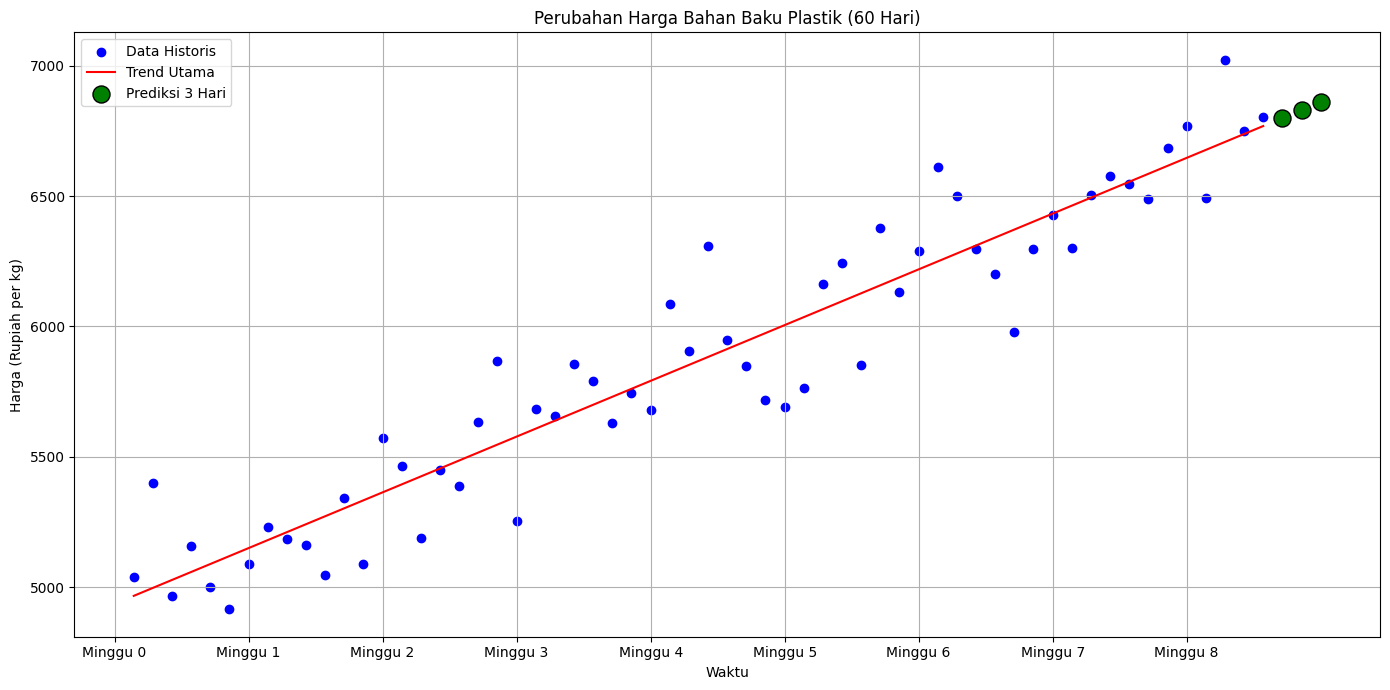


Prediksi Harga 3 Hari Kedepan:
Hari ke-61: Rp 6798.85
Hari ke-62: Rp 6829.37
Hari ke-63: Rp 6859.90


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dummy 60 hari
days = np.arange(1, 61)
base_price = 5000  # Harga dasar (misal: Rp 5.000 per kg)
noise = np.random.normal(0, 200, 60)  # Fluktuasi ±200 rupiah

# Harga dasar + tren naik + fluktuasi
prices = (
    base_price +
    30 * days +  # Tren naik Rp30/hari
    noise        # Fluktuasi acak
)

# Bentuk data untuk scikit-learn
X = days.reshape(-1, 1)
y = prices

# Latih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi 3 hari kedepan
future_days = np.array([61, 62, 63]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(14, 7))

# Plot data historis
plt.scatter(days, prices, color='blue', label='Data Historis')

# Plot trend utama
plt.plot(days, model.predict(X), color='red', label='Trend Utama')

# Plot prediksi
plt.scatter(
    future_days,
    predictions,
    color='green',
    edgecolor='black',
    s=150,
    label='Prediksi 3 Hari'
)

# Konversi hari ke minggu untuk sumbu x
total_weeks = (60 // 7) + 1  # Jumlah minggu dalam 60 hari
weeks = np.arange(1, total_weeks + 1)  # Minggu 1 hingga total_weeks
week_labels = [f"Minggu {i}" for i in weeks]

# Atur ticks dan labels sumbu x
ticks = np.arange(0, 63, 7)  # Ticks setiap 7 hari (0,7,14,...,63)
# Jika Anda ingin menampilkan "Hari 0" sebagai titik awal:
# labels = ["Hari 0"] + week_labels[:len(ticks)-1]
# Namun untuk menghindari error, gunakan:
labels = ["Minggu 0"] + week_labels  # Menambahkan "Minggu 0" sebagai awal

# Pastikan panjang ticks dan labels sama
if len(ticks) > len(labels):
    labels += [""] * (len(ticks) - len(labels))
elif len(labels) > len(ticks):
    labels = labels[:len(ticks)]

plt.xticks(ticks=ticks, labels=labels)
plt.title('Perubahan Harga Bahan Baku Plastik (60 Hari)')
plt.xlabel('Waktu')
plt.ylabel('Harga (Rupiah per kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPrediksi Harga 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


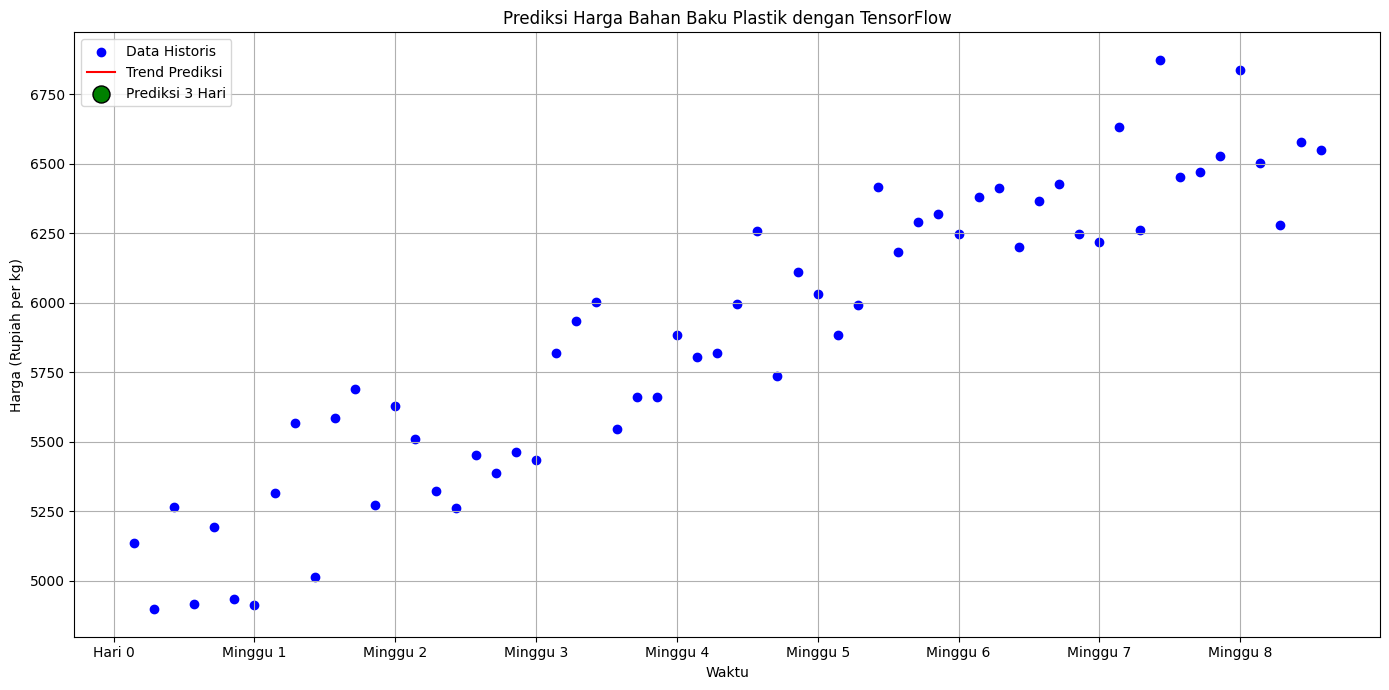


Prediksi Harga 3 Hari Kedepan:
Hari ke-61: Rp nan
Hari ke-62: Rp nan
Hari ke-63: Rp nan


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


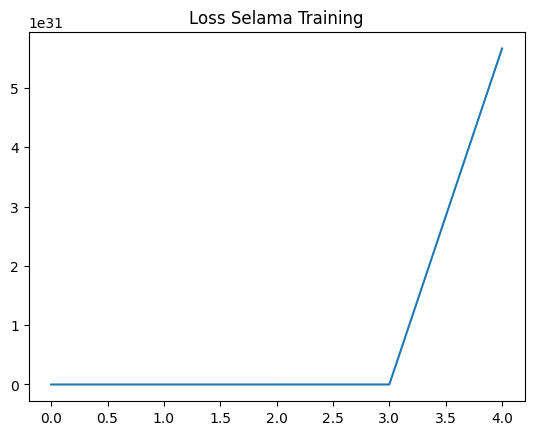

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data dummy 60 hari
days = np.arange(1, 61)
base_price = 5000  # Harga dasar (misal: Rp 5.000 per kg)
noise = np.random.normal(0, 200, 60)  # Fluktuasi ±200 rupiah

# Harga dasar + tren naik + fluktuasi
prices = (
    base_price +
    30 * days +  # Tren naik Rp30/hari
    noise        # Fluktuasi acak
)

# Bentuk data untuk TensorFlow
X = days.reshape(-1, 1)
y = prices

# Normalisasi data (opsional)
# X = (X - np.mean(X)) / np.std(X)

# Buat model TensorFlow
model = Sequential([
    Dense(1, input_shape=[1])  # Regresi linear (y = ax + b)
])

# Kompilasi model
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['mae']
)

# Latih model
history = model.fit(
    X, y,
    epochs=100,
    verbose=0  # Nonaktifkan output training
)

# Prediksi 3 hari kedepan
future_days = np.array([61, 62, 63]).reshape(-1, 1)
predictions = model.predict(future_days)

# Visualisasi
plt.figure(figsize=(14, 7))

# Plot data historis
plt.scatter(days, prices, color='blue', label='Data Historis')

# Plot prediksi model
plt.plot(days, model.predict(X).flatten(), color='red', label='Trend Prediksi')

# Plot prediksi 3 hari kedepan
plt.scatter(
    future_days,
    predictions,
    color='green',
    edgecolor='black',
    s=150,
    label='Prediksi 3 Hari'
)

# Konversi hari ke minggu untuk sumbu x
total_weeks = (60 // 7) + 1  # Jumlah minggu dalam 60 hari
weeks = np.arange(1, total_weeks + 1)
week_labels = [f"Minggu {i}" for i in weeks]

# Atur ticks dan labels sumbu x
ticks = np.arange(0, 63, 7)  # Ticks setiap 7 hari
labels = ["Hari 0"] + week_labels[:len(ticks)-1]  # Sesuaikan panjang

plt.xticks(ticks=ticks, labels=labels)
plt.title('Prediksi Harga Bahan Baku Plastik dengan TensorFlow')
plt.xlabel('Waktu')
plt.ylabel('Harga (Rupiah per kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPrediksi Harga 3 Hari Kedepan:")
for day, price in zip(future_days, predictions):
    print(f"Hari ke-{day[0]}: Rp {price[0]:.2f}")

model = Sequential([
    Dense(64, activation='relu', input_shape=[1]),
    Dense(1)
])

X = (X - np.mean(X)) / np.std(X)  # Standarisasi

model.compile(
    optimizer='adam',
    loss='huber_loss',
    metrics=['mae']
)

plt.plot(history.history['loss'])
plt.title('Loss Selama Training')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


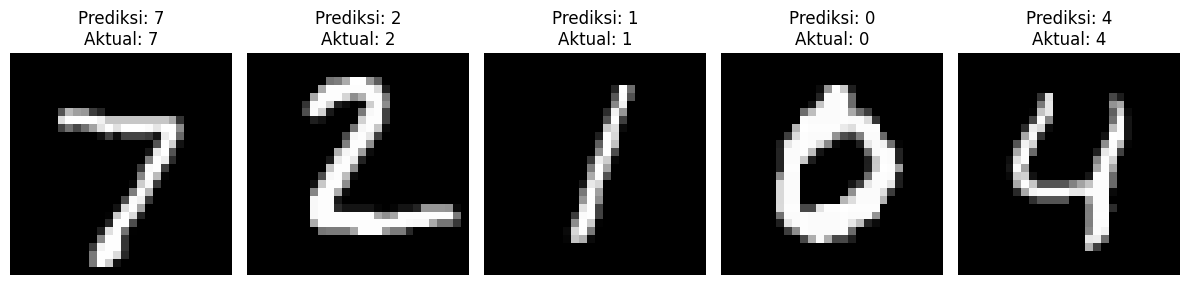

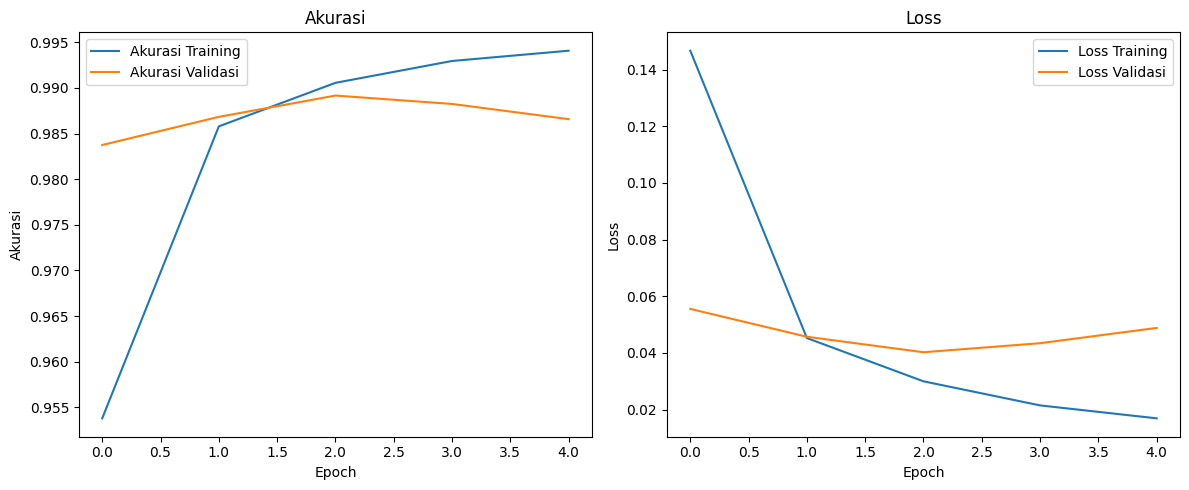

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Muat dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pra-pemrosesan data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Buat model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Latih model
history = model.fit(
    X_train, y_train_cat,
    epochs=5,  # Ganti dengan 10-15 epoch untuk akurasi lebih tinggi
    validation_split=0.2,
    verbose=0
)

# Fungsi visualisasi
def plot_predictions(model, test_images, true_labels, num_images=5):
    plt.figure(figsize=(12, 4))
    predictions = model.predict(test_images[:num_images])
    predicted_labels = np.argmax(predictions, axis=1)

    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Prediksi: {predicted_labels[i]}\nAktual: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualisasi hasil prediksi
plot_predictions(model, X_test, y_test)

# Grafik akurasi dan loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()